In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor,GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel,RationalQuadratic, Matern, DotProduct

In [4]:
ds_demo = pd.read_csv("income_dataset/twitter_income.csv").drop(['Unnamed: 0'],axis=1)
y = pd.cut(ds_demo.loc[:,"mean_income"], bins = 10, labels = list(range(0,10)))
# X = ds_demo.loc[:,['Topic_163','Topic_139','Topic_124','Topic_28','listed','enlish_tweets','Topic_95','Topic_162','foll_friend_ratio',
#  'followers','Topic_32','Topic_173','Topic_56','optimism:optimist','Topic_36','urls','friends','Topic_150','religion:muslim','Topic_157']]
# X = ds_demo.loc[:,['Topic_95','Topic_116','Topic_158',
#                    'Topic_163','Topic_139','Topic_97','Topic_124',
#                    'Topic_38','Topic_37','Topic_19','Topic_64','Topic_11',
#                    'Topic_120','Topic_66','Topic_3','Topic_40','Topic_105','Topic_153','Topic_170','Topic_99']]

X = ds_demo.loc[:,['Topic_173',
 'Topic_116',
 'Topic_124',
 'Topic_107',
 'Topic_139',
 'Topic_163',
 'age',
 'Topic_11',
 'Topic_105',
 'Topic_29',
 'Topic_180',
 'Topic_196',
 'Topic_66',
 'Topic_49',
 'foll_friend_ratio',
 'Topic_76',
 'listed',
 'Topic_160',
 'gender:female_gt_0_5',
 'Topic_95']]

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=999)

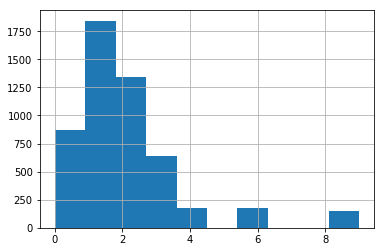

In [5]:
y.hist()

In [ ]:
kernel = 1.* RBF(length_scale=1., length_scale_bounds=(1e-5, 1e5)) \
#     + WhiteKernel(noise_level=1., noise_level_bounds=(1e-5, 1e5)) \
#     + RationalQuadratic(length_scale=1.) \
    
# gp = GaussianProcessRegressor(kernel=kernel, random_state=999)
gp = GaussianProcessClassifier(kernel=kernel, random_state=999)


gp.fit(X_train, y_train)

y_pred, sigma = gp.predict(X_test, return_std=True)

print(gp.log_marginal_likelihood_value_)
print(gp.kernel_)

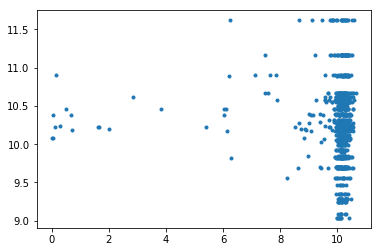

In [80]:
plt.plot(y_pred, y_test, '.')

In [81]:
y_pred

array([10.07214014,  9.92953187, 10.54556282, ...,  6.11899567,
       10.25565727,  7.63090396])

In [86]:
gp.score(X_test, y_test)

0.026772504513657983

In [ ]:
scores = cross_val_score(dt, X, y, cv = 10)

In [ ]:
np.mean(scores)